## Correlate Spec Params & ERP measures

### Merge exp results with param results

In [2]:
# Define paths
REPO_PATH = r"C:\Users\Andre\projects\v1_v4_1024_elec" # set this
PROJECT_PATH = r'G:\Shared drives\v1_v4_1024'

# Dataset details
FS = 500 # sampling frequency
SESSIONS = ['L_SNR_250717', 'A_SNR_140819', 'A_SNR_041018'] # List of sessions to analyze

In [1]:
# general
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# custom
import sys
sys.path.append("../code")
from paths import EXTERNAL_PATH, PROJECT_PATH
from info import FS, SESSIONS

In [2]:
# load dfs
erp_params_df = pd.read_csv(fr'{PROJECT_PATH}\data\results\max_erp_params_df.csv', index_col=0)
spec_params_df = pd.read_csv(fr"{PROJECT_PATH}\data\results\lfp_spectral_params.csv", index_col=0)

In [3]:
spec_params_df

,session,channel,chan_idx,array,epoch,offset,knee,exponent,cf_0,pw_0,...,pw_1,bw_1,cf_2,pw_2,bw_2,cf_3,pw_3,bw_3,error,r_squared
0,A_SNR_140819,0,0,1,pre,8.250311,5413.760937,3.660094,20.761566,0.293874,...,0.197448,9.742920,69.580402,0.226458,4.000000,NaN,NaN,NaN,0.031894,0.998489
1,A_SNR_140819,1,1,1,pre,8.123542,5823.334791,3.641594,21.187425,0.275064,...,0.218554,9.161468,69.608105,0.252213,4.000000,NaN,NaN,NaN,0.024117,0.998853
2,A_SNR_140819,2,2,1,pre,7.435895,1192.281172,3.096264,13.167393,0.255324,...,0.230272,11.088440,83.034727,0.265393,20.000000,NaN,NaN,NaN,0.051569,0.994847
3,A_SNR_140819,3,3,1,pre,8.042354,5815.931666,3.603246,21.469165,0.259553,...,0.174634,9.513133,69.419959,0.268177,4.000000,NaN,NaN,NaN,0.021202,0.998999
4,A_SNR_140819,4,4,1,pre,7.885415,4011.093210,3.485834,21.199995,0.275271,...,0.179327,10.023394,69.388871,0.270873,4.000000,NaN,NaN,NaN,0.021975,0.998878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6139,A_SNR_041018,59,1019,16,post,8.218674,920.375636,2.957407,15.313949,0.346989,...,0.361749,6.217917,53.053373,0.417390,7.605257,66.240554,0.618275,12.202779,0.036642,0.997392
6140,A_SNR_041018,60,1020,16,post,7.957116,524.482942,2.840909,15.249014,0.339185,...,0.337440,5.783263,52.554341,0.341313,6.525079,66.035262,0.526361,13.776319,0.037998,0.997116
6141,A_SNR_041018,61,1021,16,post,7.514403,161.380709,2.477766,15.290988,0.332045,...,0.274705,4.258126,52.224874,0.303241,6.001945,66.135492,0.458828,15.696865,0.038280,0.996419
6142,A_SNR_041018,62,1022,16,post,7.782704,394.067650,2.638067,18.368436,0.290650,...,0.335045,6.784725,66.136008,0.497800,13.875347,NaN,NaN,NaN,0.039157,0.996628


In [4]:
erp_params_df

,array,channel,latency,amp,widths
session,,,,,
A_SNR_041018,1,0,0.147333,75.101061,22.302186
A_SNR_041018,1,1,0.104000,93.524071,17.847413
A_SNR_041018,1,2,0.105000,134.283942,15.658427
A_SNR_041018,1,3,0.142000,191.374226,21.470952
A_SNR_041018,1,4,0.144000,190.579486,21.594657
...,...,...,...,...,...
L_SNR_250717,16,59,0.125333,106.029538,15.905572
L_SNR_250717,16,60,0.107000,84.374466,15.218832
L_SNR_250717,16,61,0.172667,66.407969,18.074929


In [5]:
# Instead, below we will compute the change in expoent
# spec_params_df = spec_params_df.loc[spec_params_df["epoch"]=="post"]
# spec_params_df


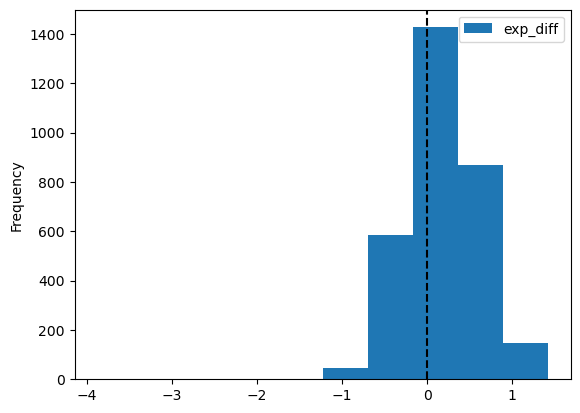

In [6]:
# compute stimulus-evoked change in exponent
df_post = spec_params_df.loc[spec_params_df["epoch"]=="post"]
df_pre = spec_params_df.loc[spec_params_df["epoch"]=="pre"]
df_merge = df_post.merge(df_pre, on=['session','channel','chan_idx','array'], suffixes=['_post', '_pre'])
df_params = df_merge.drop(columns=['epoch_pre','epoch_post'])
df_params['exp_diff'] = df_params['exponent_post'] - df_params['exponent_pre']
df_params['offset_diff'] = df_params['offset_post'] - df_params['offset_pre']

# plot
df_params.plot(y='exp_diff', kind='hist')
ax = plt.gca()
ax.axvline(0, color='k', linestyle='--')

# show df
df_params
df_params.to_csv(fr"{PROJECT_PATH}\data\results\spectral_params_diff.csv")


In [7]:
# merge dataframes
results_df = pd.merge(left=erp_params_df, right=df_params, on= ["session", "array", "channel"])
results_df.to_csv(r'G:\Shared drives\v1_v4_1024\data\results\spec_erp_results.csv')
results_df

,session,array,channel,latency,amp,widths,chan_idx,offset_post,knee_post,exponent_post,...,cf_2_pre,pw_2_pre,bw_2_pre,cf_3_pre,pw_3_pre,bw_3_pre,error_pre,r_squared_pre,exp_diff,offset_diff
0,A_SNR_041018,1,0,0.147333,75.101061,22.302186,0,8.191821,823.508756,2.943896,...,95.159885,0.288779,20.0,NaN,NaN,NaN,0.028744,0.998865,-0.542672,-0.624654
1,A_SNR_041018,1,1,0.104000,93.524071,17.847413,1,8.584232,2931.305006,3.199538,...,NaN,NaN,NaN,NaN,NaN,NaN,0.046830,0.996765,-0.213096,-0.047696
2,A_SNR_041018,1,2,0.105000,134.283942,15.658427,2,8.439395,1957.538421,3.137555,...,80.710057,0.267649,20.0,NaN,NaN,NaN,0.041852,0.996802,-0.041059,0.287920
3,A_SNR_041018,1,3,0.142000,191.374226,21.470952,3,8.716437,3361.035030,3.330809,...,93.154080,0.259215,20.0,NaN,NaN,NaN,0.028434,0.998620,-0.060325,0.228993
4,A_SNR_041018,1,4,0.144000,190.579486,21.594657,4,8.668194,2800.125700,3.319576,...,80.127367,0.218761,20.0,NaN,NaN,NaN,0.035657,0.997916,0.060765,0.439111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3067,L_SNR_250717,16,59,0.125333,106.029538,15.905572,1019,8.072765,368.888223,2.765816,...,NaN,NaN,NaN,NaN,NaN,NaN,0.049567,0.995542,-0.038602,0.545234
3068,L_SNR_250717,16,60,0.107000,84.374466,15.218832,1020,8.280201,823.197428,2.800549,...,NaN,NaN,NaN,NaN,NaN,NaN,0.041259,0.996774,0.190018,0.929265
3069,L_SNR_250717,16,61,0.172667,66.407969,18.074929,1021,8.571924,1261.399057,2.944253,...,NaN,NaN,NaN,NaN,NaN,NaN,0.045173,0.996864,-0.067532,0.598920
3070,L_SNR_250717,16,62,0.103000,80.707024,14.002658,1022,8.790192,2288.203674,3.043717,...,NaN,NaN,NaN,NaN,NaN,NaN,0.036738,0.997915,-0.031374,0.717300


### plot exp and amp

exp = y
amp = x
scatterplot
color by session

[Text(0.5, 0, 'ERP peak amplitude'), Text(0, 0.5, 'Δ LFP exponent')]

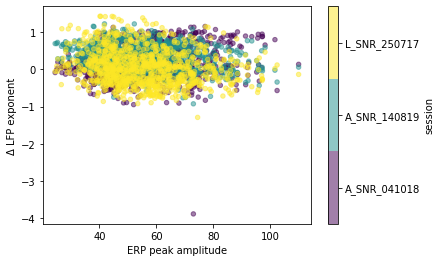

In [63]:
# changed from amp_abs to amp from this point on
results_df['session'] = pd.Categorical(results_df['session'])
fig, ax = plt.subplots(1,1, figsize=[6,4])
results_df.plot.scatter(x="amp", y="exp_diff", c="session", cmap="viridis", alpha=0.5, ax=ax)
ax.set(xlabel="ERP peak amplitude", ylabel="\u0394 LFP exponent")


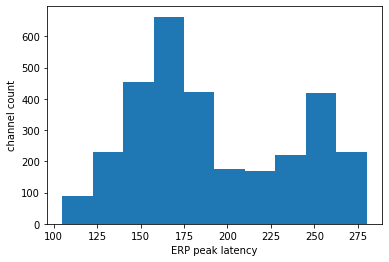

In [42]:
# plot histogram of latency
# time = np.arange(-0.3, 0.7, 1/FS) * 1000

fig, ax = plt.subplots(1,1, figsize=[6,4])
ax.hist(results_df['latency'])
ax.set(xlabel="ERP peak latency", ylabel="channel count")
plt.show()

### linear regression 


linear regression for each session
run what's needed for additional session to continue with 3

In [57]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x=results_df["amp"], y=results_df["exp_diff"])

In [58]:
y_pred = intercept + slope*results_df["amp"]

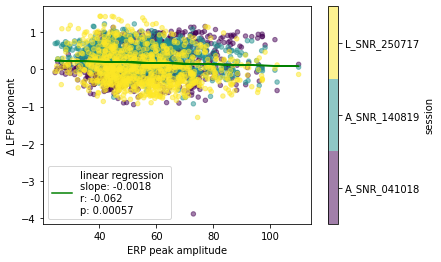

In [62]:
fig, ax = plt.subplots(1,1, figsize=[6,4])
results_df.plot.scatter(x="amp", y="exp_diff", c="session", cmap="viridis", alpha=0.5, ax=ax)
label = f"linear regression \nslope: {slope:.2} \nr: {rvalue:.2} \np: {pvalue:.2}"
ax.plot(results_df["amp"], y_pred, color="green", label=label)
ax.set(xlabel="ERP peak amplitude", ylabel="\u0394 LFP exponent")
ax.legend()
plt.show()

In [48]:
colors = np.array(["red", "green"])

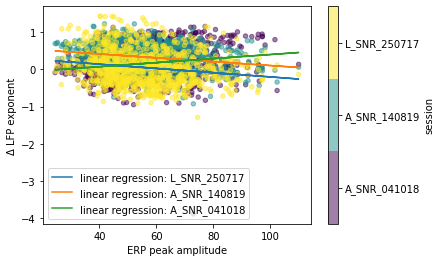

In [71]:
# create linear regression by session

# plot scatter
fig, ax = plt.subplots(1,1, figsize=[6,4])
results_df.plot.scatter(x="amp", y="exp_diff", c="session", cmap="viridis", alpha=0.5, ax=ax)

# plot linear regression for each session
for session in SESSIONS: 
    results_session = results_df.loc[results_df["session"]==session]

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x=results_session["amp"], y=results_session["exp_diff"])
    y_pred = intercept + slope*results_session["amp"]

    ax.plot(results_session["amp"],y_pred, label=f"linear regression: {session}")

# label plot
ax.set(xlabel="ERP peak amplitude", ylabel="\u0394 LFP exponent")
ax.legend()

# save/show figure
#ax.figure.savefig(r"G:\Shared drives\v1_v4_1024\figures\linregress_exp_ampabs.png")
plt.show()



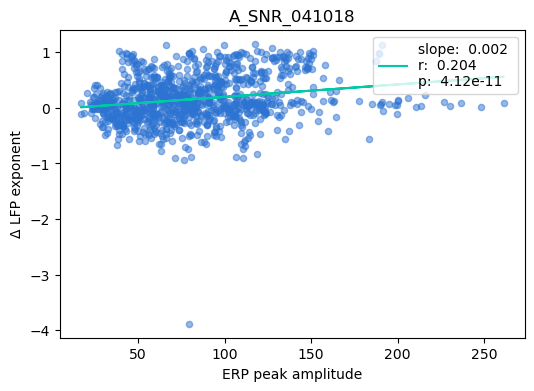

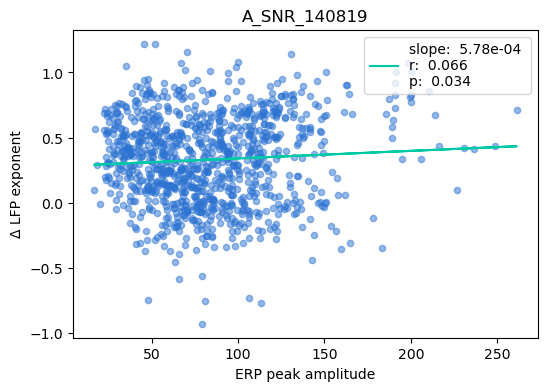

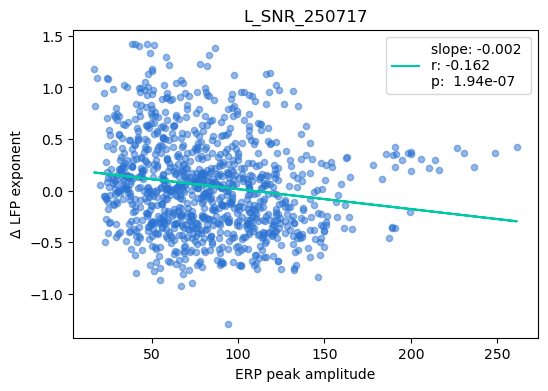

In [12]:
for session in SESSIONS:
    # get data for sessoin
    results_session = results_df.loc[results_df["session"]==session]

    # plot scatter
    fig, ax = plt.subplots(1,1, figsize=[6,4])
    results_session.plot.scatter(x="amp", y="exp_diff", alpha=0.5, ax=ax, color='#2C73D2')
    
    # plot linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x=results_session["amp"], y=results_session["exp_diff"])
    text_dict = dict()
    for key, var in zip(['slope', 'rvalue', 'pvalue'], [slope, rvalue, pvalue]):
        if np.abs(var) < 0.001:
            text_dict[key] = f'{var: .2e}'
        else:
            text_dict[key] = f'{var: .3f}'
    y_pred = intercept + slope*results_session["amp"]
    label = f"slope: {text_dict['slope']} \nr: {text_dict['rvalue']} \np: {text_dict['pvalue']}"
    ax.plot(results_session["amp"],y_pred, label=label, color="#00C9A7")

    # label plot
    ax.set(xlabel="ERP peak amplitude", ylabel="\u0394 LFP exponent")
    ax.set_title(session)
    ax.legend(loc="upper right")

    # save/show figure
    ax.figure.savefig(fr"{PROJECT_PATH}\figures\presentation_figs\linregress_{session}.png")
    plt.show()


### Calculate difference in offset

[Text(0.5, 0, 'ERP peak amplitude'), Text(0, 0.5, 'Δ Offset')]

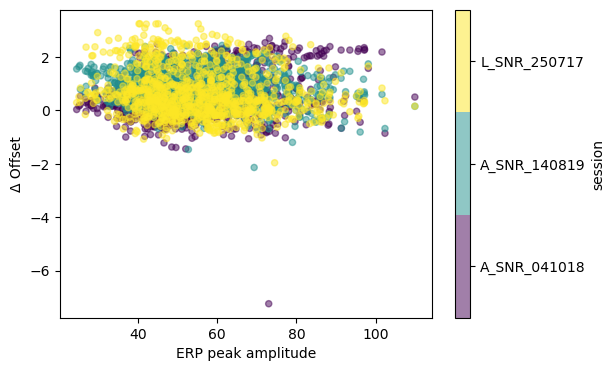

In [20]:
# changed from amp_abs to amp from this point on
results_df['session'] = pd.Categorical(results_df['session'])
fig, ax = plt.subplots(1,1, figsize=[6,4])
results_df.plot.scatter(x="amp", y="offset_diff", c="session", cmap="viridis", alpha=0.5, ax=ax)
ax.set(xlabel="ERP peak amplitude", ylabel="\u0394 Offset")